In [7]:
import sys
from pathlib import Path

# Setup import system
project_root = Path.cwd().parents[3]
sys.path.append(str(project_root))

In [8]:
import numpy as np
import pandas as pd

from src.homeworks.KNN.knn_classifier.KNNClassifier import KNNClassifier
from src.homeworks.KNN.processing.data_split import train_test_split
from src.homeworks.KNN.processing.scaling_strategies.min_max_scaler import MinMaxScaler 
from src.homeworks.KNN.processing.scaling_strategies.max_abs_scaler import MaxAbsScaler 
from src.homeworks.KNN.processing.scaling_strategies.standard_scaler import StandardScaler
from src.homeworks.KNN.processing.metrics import accuracy, f1_score
import matplotlib.pyplot as plt

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
df = pd.read_csv("spam.csv")

In [11]:
df.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [12]:
df[df.isna().any(axis=1)]
# No Nan in table

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label


In [13]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [14]:
df["label"].value_counts()

label
0    2788
1    1813
Name: count, dtype: int64

In [15]:
X = df.drop(columns="label")
y = df["label"]
tuple_x = [tuple(point) for point in X.values.tolist()]
X_train, X_test, y_train, y_test = train_test_split(tuple_x, y.tolist(), to_shuffle=True)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, to_shuffle=True)

In [22]:
# SCALING DATA

min_max = MinMaxScaler()
X_train_min_max = min_max.fit_transform(X_train)
X_validation_min_max = min_max.fit_transform(X_validation)
X_test_min_max = min_max.fit_transform(X_test)

max_abs = MaxAbsScaler()
X_train_max_abs = max_abs.fit_transform(X_train)
X_validation_max_abs = max_abs.fit_transform(X_validation)
X_test_max_abs = max_abs.fit_transform(X_test)

standart = StandardScaler()
X_train_standart = standart.fit_transform(X_train)
X_validation_standart = standart.fit_transform(X_validation)
X_test_standart = standart.fit_transform(X_test)

In [23]:
k_values = range(1, 100)

In [24]:
# Choosing best hyperparameters by metric

def best_hyperparameters(accuracy_matrix, f1_matrix, k_values, name="graph", to_save=True, to_show=True) -> tuple[int, int, float]:
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, accuracy_matrix, marker='o', label='Accuracy', linestyle='-', color='b')
    plt.plot(k_values, f1_matrix, marker='s', label='F1 Score', linestyle='-', color='g')
    plt.xlabel('K-values')
    plt.ylabel('Metrics')
    plt.title('Accuracy and F1 Score vs K-values')
    plt.legend()
    plt.grid(True)
    if to_save:
        plt.savefig(f"{name}.png")
    if to_show:
        plt.show()
    accuracy_index = int(np.argmax(accuracy_matrix))
    f1_index = int(np.argmax(f1_matrix))
    print(f"Best accuracy at k={k_values[accuracy_index]} ({accuracy_matrix[accuracy_index]:.3f})")
    print(f"Best f1_score at k={k_values[f1_index]} ({f1_matrix[f1_index]:.3f})")


In [51]:
# Compute accuracy and f1 

def get_accuracy_f1_matrix(X_train, X_validation, y_train, y_validation, k_values, leaf_size=5):
    accuracy_matrix = [0] * len(k_values)
    f1_matrix =[0] * len(k_values)
    for i, k in enumerate(k_values):
        model = KNNClassifier(k, leaf_size)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_validation)
        accuracy_matrix[i] = accuracy(y_validation, y_pred)
        f1_matrix[i] = f1_score(y_validation, y_pred)
    return accuracy_matrix, f1_matrix

<div align="center" style="font-size: 26px; font-weight: bold;">Without scaling</div>

In [26]:
# Compute accuracy and f1

X_t = X_train
X_v = X_validation
y_t = y_train
y_v = y_validation

accuracy_matrix_no_scale, f1_matrix_no_scale = get_accuracy_f1_matrix(X_t, X_v, y_t, y_v, k_values)

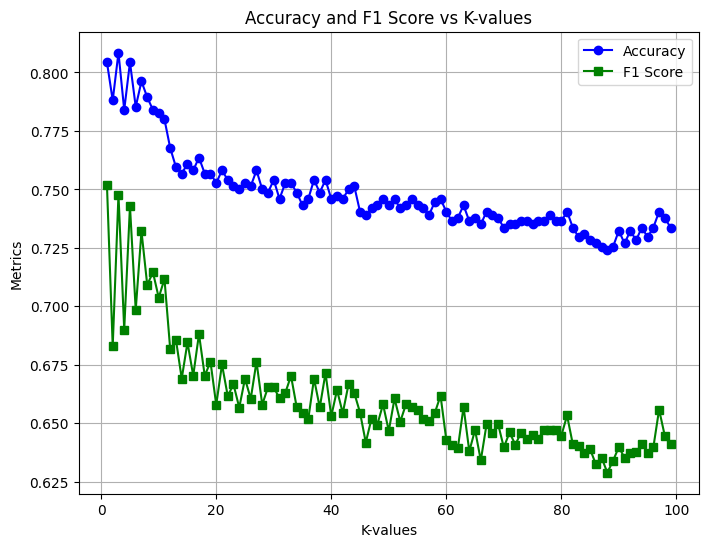

Best accuracy at k=3 (0.808)
Best f1_score at k=1 (0.752)


In [30]:
best_hyperparameters(accuracy_matrix_no_scale, f1_matrix_no_scale, k_values, name="no_scale")

In [31]:
k_no_scale = 3

<div align="center" style="font-size: 26px; font-weight: bold;">MinMax</div>

In [28]:
# Compute accuracy and f1 

X_t = X_train_min_max
X_v = X_validation_min_max
y_t = y_train
y_v = y_validation

accuracy_matrix_min_max, f1_matrix_min_max = get_accuracy_f1_matrix(X_t, X_v, y_t, y_v, k_values)

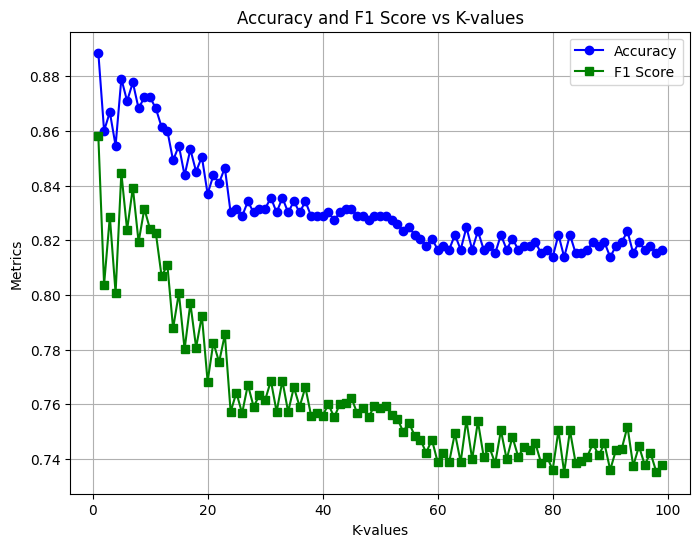

Best accuracy at k=1 (0.889)
Best f1_score at k=1 (0.858)


In [32]:
best_hyperparameters(accuracy_matrix_min_max, f1_matrix_min_max, k_values, name="min_max_scale")

In [33]:
k_min_max = 1

<div align="center" style="font-size: 26px; font-weight: bold;">MaxAbs</div>

In [34]:
# Compute accuracy and f1 

X_t = X_train_max_abs
X_v = X_validation_max_abs
y_t = y_train
y_v = y_validation

accuracy_matrix_max_abs, f1_matrix_max_abs = get_accuracy_f1_matrix(X_t, X_v, y_t, y_v, k_values)

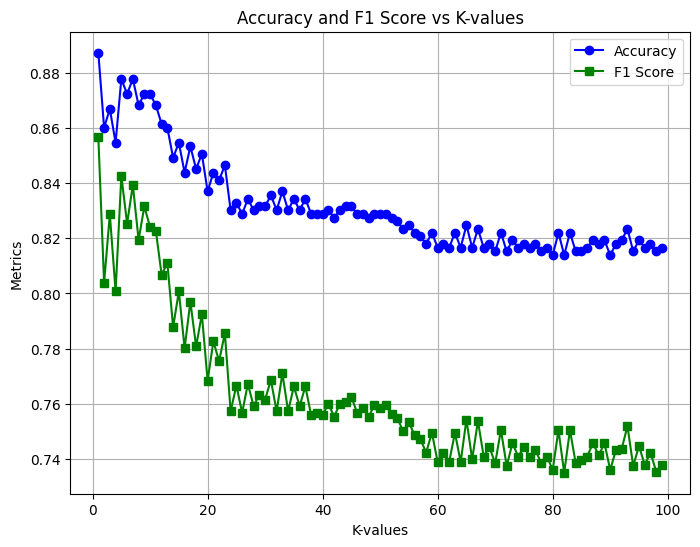

Best accuracy at k=1 (0.887)
Best f1_score at k=1 (0.857)


In [35]:
best_hyperparameters(accuracy_matrix_max_abs, f1_matrix_max_abs, k_values, name="max_abs_scale")

In [45]:
k_max_abs = 1

<div align="center" style="font-size: 26px; font-weight: bold;">StandardScaler</div>

In [36]:
# Compute accuracy and f1 

X_t = X_train_standart
X_v = X_validation_standart
y_t = y_train
y_v = y_validation

accuracy_matrix_standart, f1_matrix_standart = get_accuracy_f1_matrix(X_t, X_v, y_t, y_v, k_values)

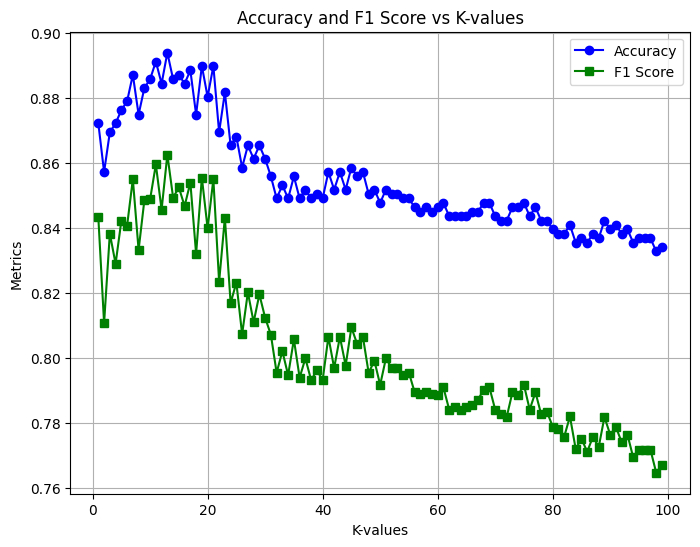

Best accuracy at k=13 (0.894)
Best f1_score at k=13 (0.863)


In [37]:
best_hyperparameters(accuracy_matrix_standart, f1_matrix_standart, k_values, name="standart_scale")

In [41]:
k_standart = 13

<div align="center" style="font-size: 26px; font-weight: bold;">Run test</div>

In [42]:
knn_no_scale = KNNClassifier(k_no_scale, leaf_size=5)
knn_no_scale.fit(X_train, y_train)
result_no_scale = knn_no_scale.predict(X_test)

In [43]:
knn_min_max = KNNClassifier(k_min_max, leaf_size=5)
knn_min_max.fit(X_train_min_max, y_train)
result_min_max = knn_min_max.predict(X_test_min_max)

In [46]:
knn_max_abs = KNNClassifier(k_max_abs, leaf_size=5)
knn_max_abs.fit(X_train_max_abs, y_train)
result_max_abs = knn_max_abs.predict(X_test_max_abs)

In [47]:
knn_standart = KNNClassifier(k_standart, leaf_size=5)
knn_standart.fit(X_train_standart, y_train)
result_standart = knn_standart.predict(X_test_standart)

In [48]:
accuracy_no_scale = accuracy(result_no_scale, y_test)
accuracy_min_max = accuracy(result_min_max, y_test)
accuracy_max_abs = accuracy(result_max_abs, y_test)
accuracy_standart = accuracy(result_standart, y_test)

f1_no_scale = f1_score(result_no_scale, y_test)
f1_min_max = f1_score(result_min_max, y_test)
f1_max_abs = f1_score(result_max_abs, y_test)
f1_standart = f1_score(result_standart, y_test)

print(f"""NoScale Accuracy={accuracy_no_scale:.3f}, f1_score={f1_no_scale:.3f}
MinMax Accuracy={accuracy_min_max:.3f}, f1_score={f1_min_max:.3f}
MaxAbs Accuracy={accuracy_max_abs:.3f}, f1_score={f1_max_abs:.3f}
StandartScale Accuracy={accuracy_standart:.3f}, f1_score={f1_standart:.3f}""")

NoScale Accuracy=0.807, f1_score=0.741
MinMax Accuracy=0.870, f1_score=0.822
MaxAbs Accuracy=0.869, f1_score=0.820
StandartScale Accuracy=0.915, f1_score=0.879


**StandartScale, k=13**

Accuracy = 0.915, f1 = 0.879